# Decision Tree Classification

In [13]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [3]:
df = pd.read_csv('data/heart_v2.csv')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [6]:
# Split the data into x and y variables.
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [8]:
#Split the data into train and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)
print(X_train.shape)
print(X_test.shape)

(189, 4)
(81, 4)


## Model Building
- Fit the decision tree with default hyperparameters.
- Set max_depth to 3.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

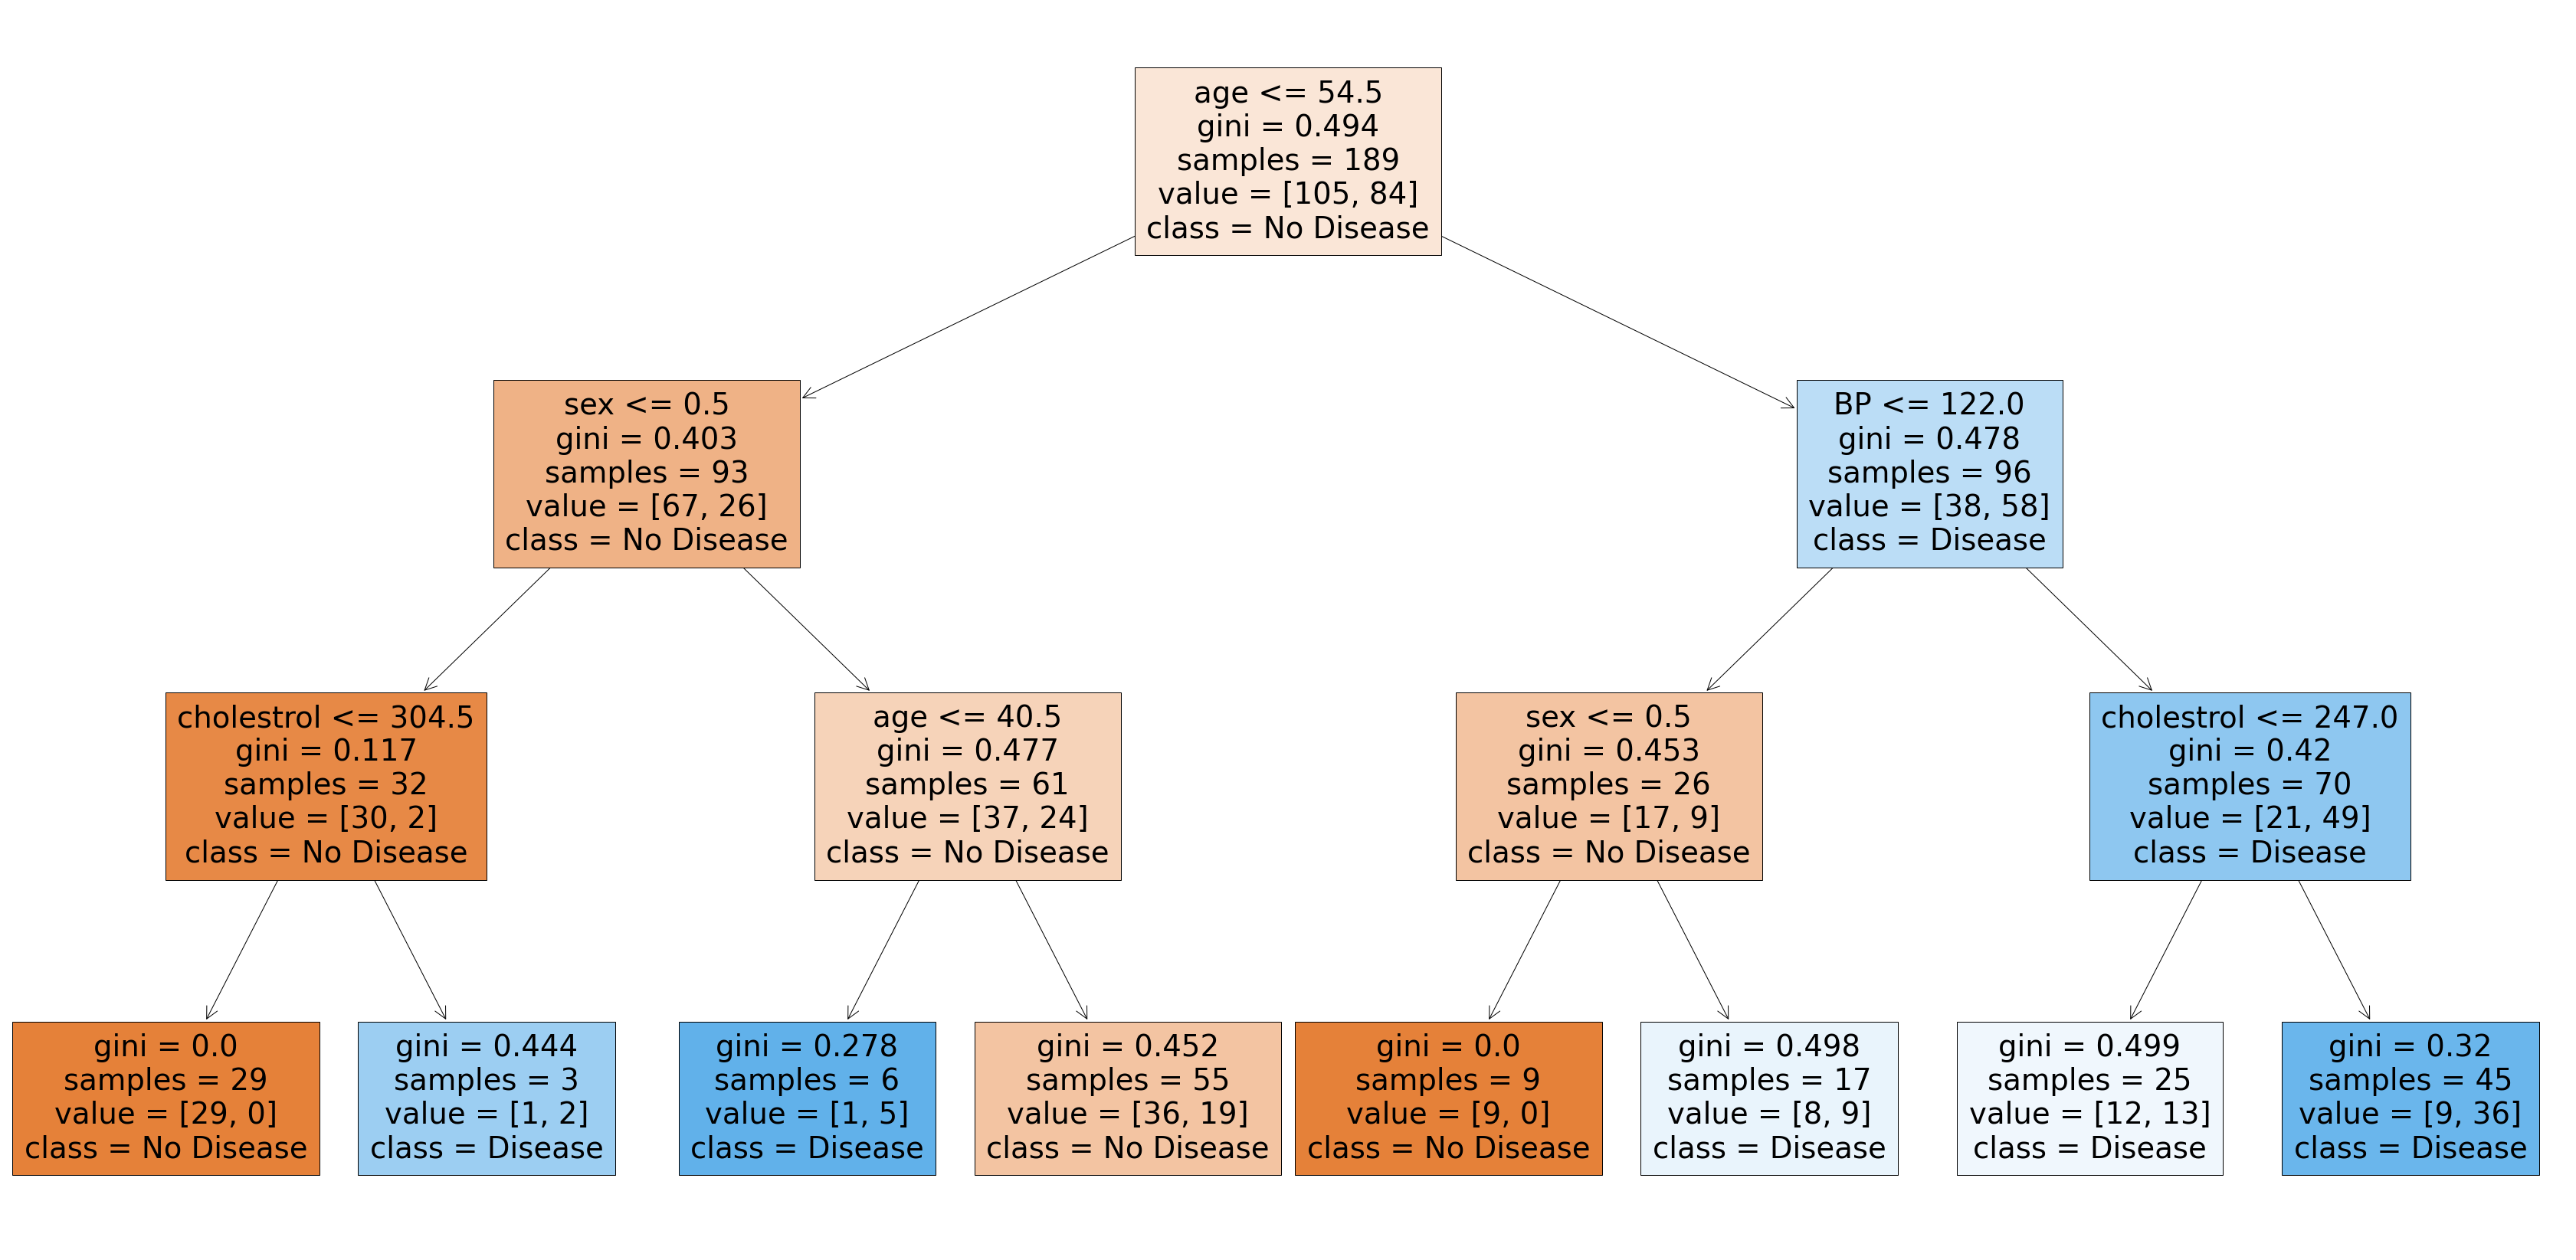

In [18]:
# Plot tree
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

## Evaluate the Model

In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(y_train, y_train_pred)
cnm = confusion_matrix(y_train, y_train_pred)

print('Accuracy = ', acc)
print('Confusion Matrix = ', cnm)

Accuracy =  0.7354497354497355
Confusion Matrix =  [[74 31]
 [19 65]]


# Tune Hyper-parameters

### Create generic function
- It is going to used every time after tuning.

In [38]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


# Creating helper functions to evaluate model performance and help plot the decision tree

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [32]:
evaluate_model(dt)

Train Accuracy : 0.7354497354497355
Train Confusion Matrix:
[[74 31]
 [19 65]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[22 23]
 [14 22]]


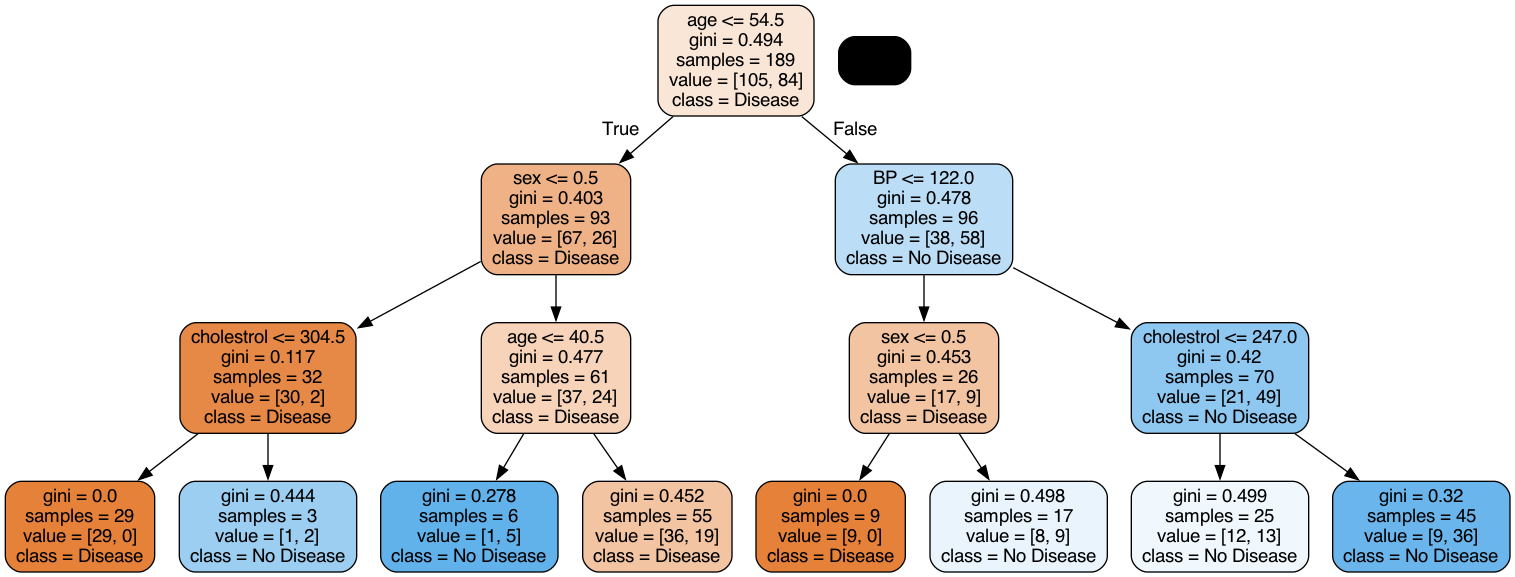

In [39]:
gph = get_dt_graph(dt)
Image(gph.create_png())

### Now check the different hyperparameters.

## 1. Without any hyperparameters
- Not even the tree depth.

In [42]:
dt_without_param = DecisionTreeClassifier(random_state=100)
dt_without_param.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

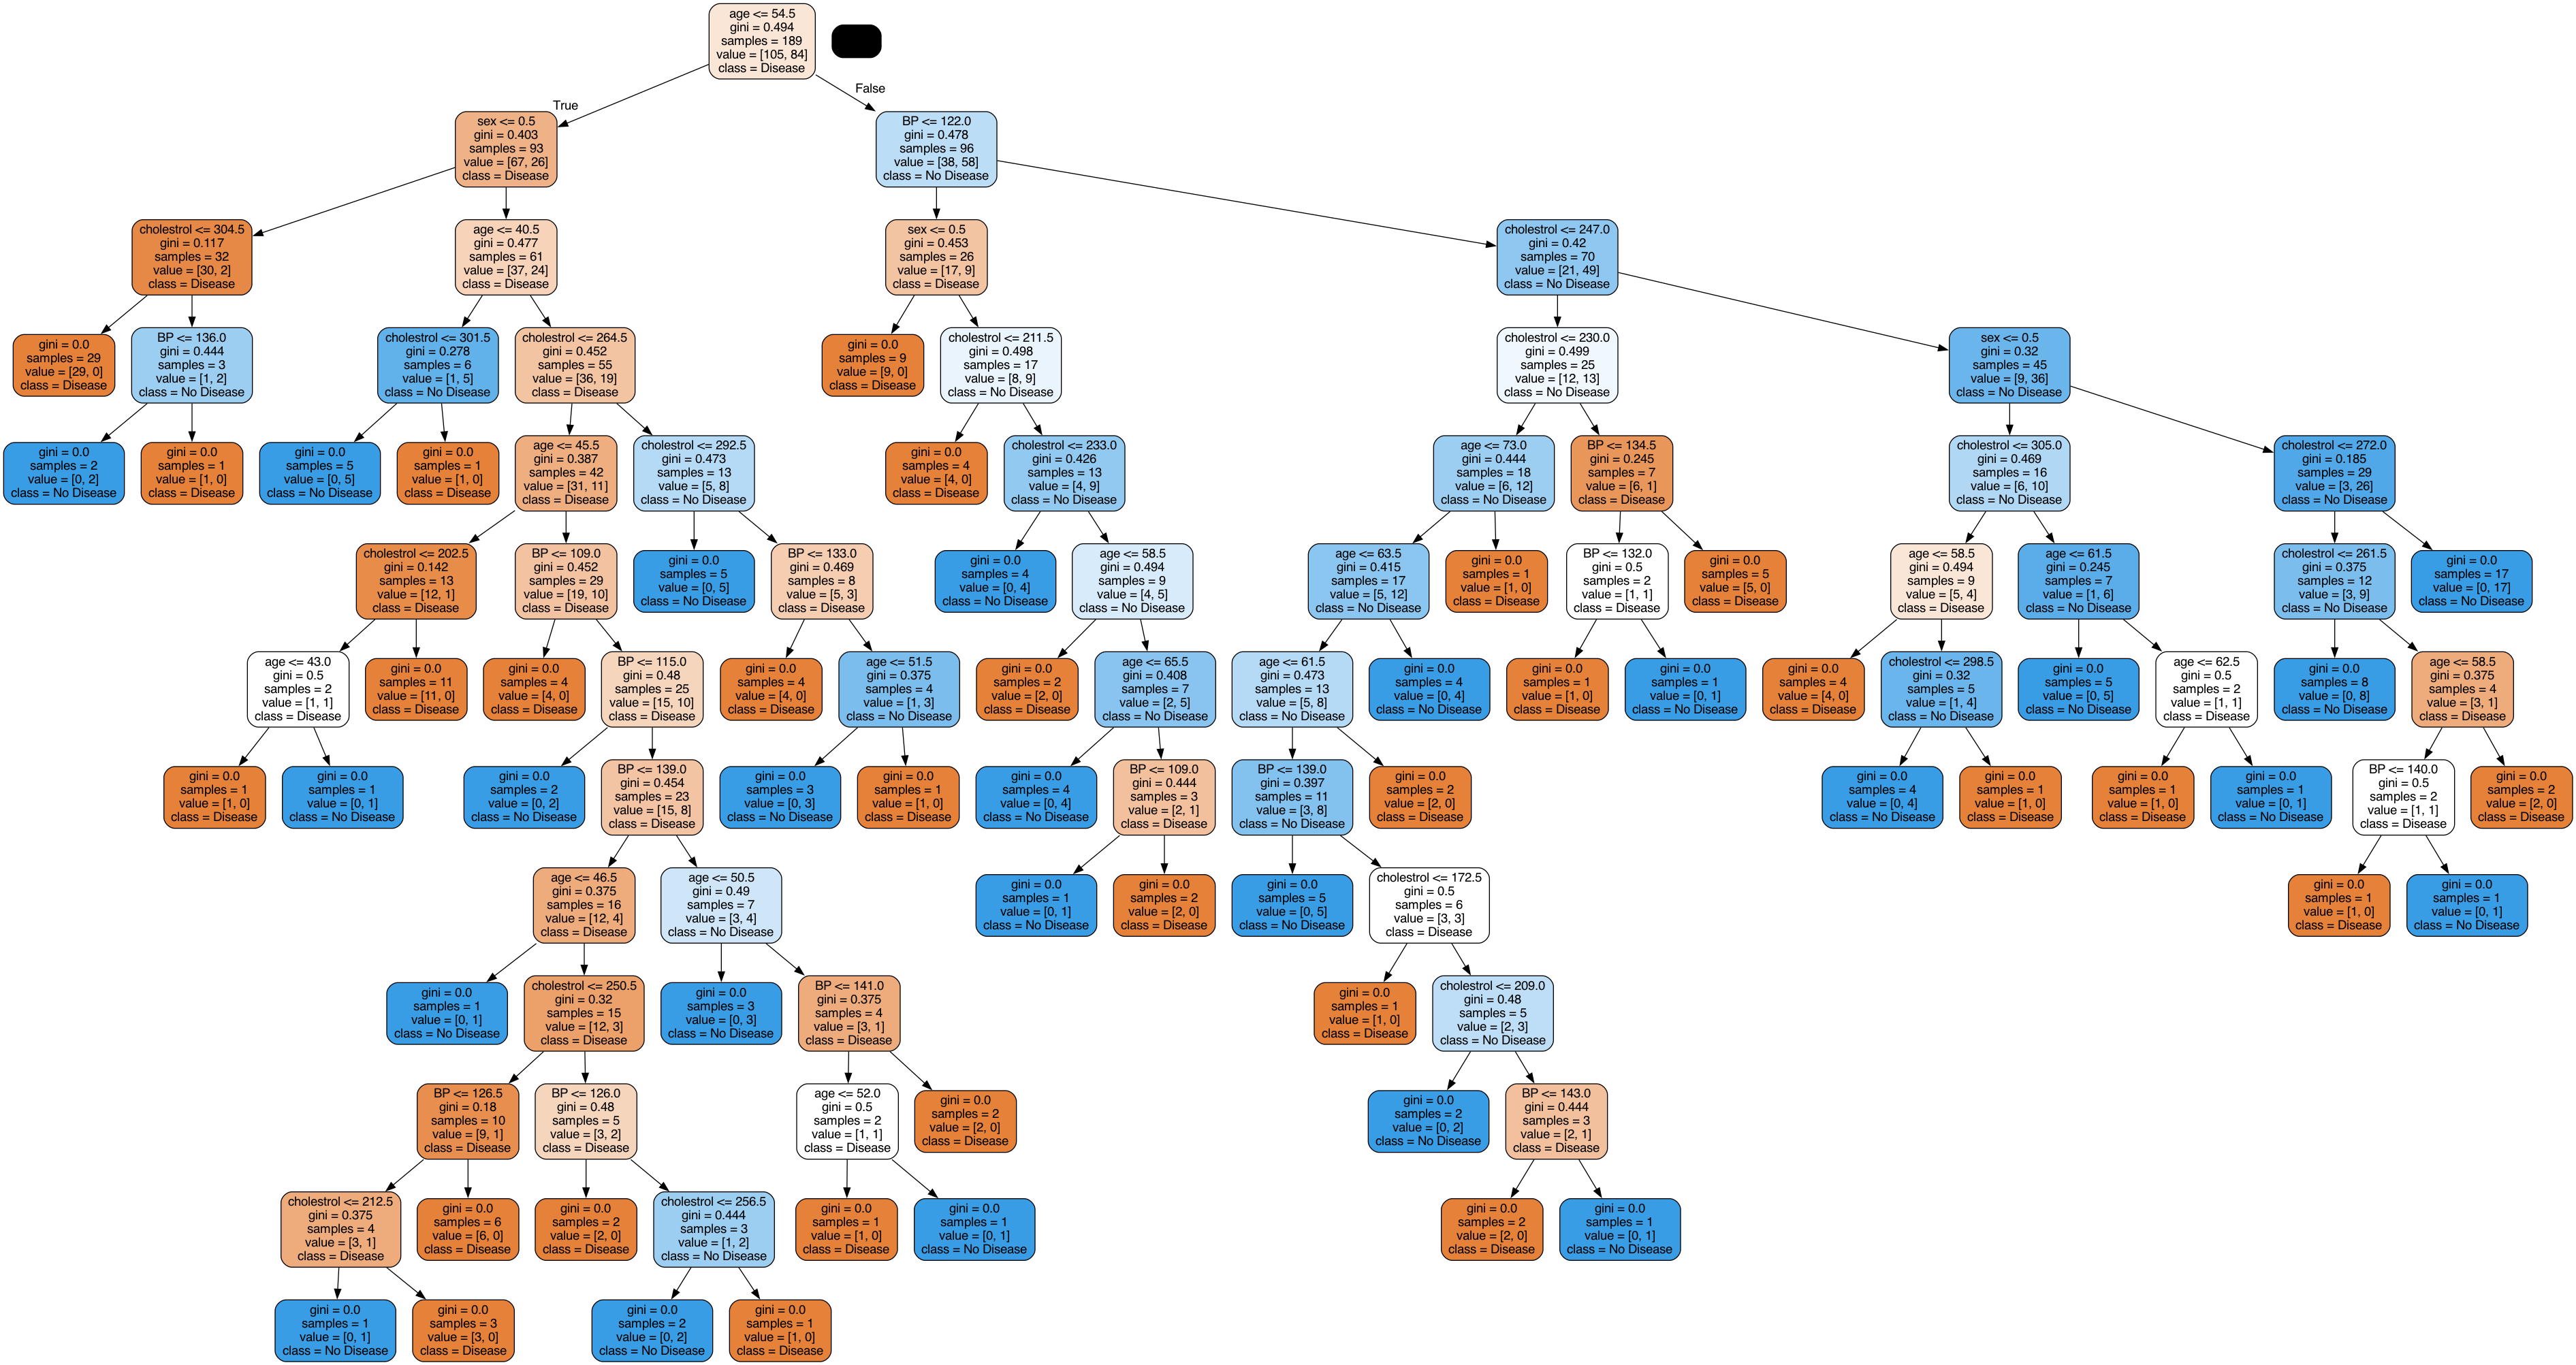

In [44]:
gph = get_dt_graph(dt_without_param)
Image(gph.create_png())

#### Note: Here you can see that the tree without any param, become very complex and large.

In [45]:
evaluate_model(dt_without_param)

Train Accuracy : 1.0
Train Confusion Matrix:
[[105   0]
 [  0  84]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[22 23]
 [14 22]]


#### Note: Here you can see that the accuracy is 100% for train set and for test it is 54%. Which is clear case of the overfitting.

## 2. Set the depth parameter

In [47]:
dt_depth = DecisionTreeClassifier(max_depth=4, random_state=100)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=100)

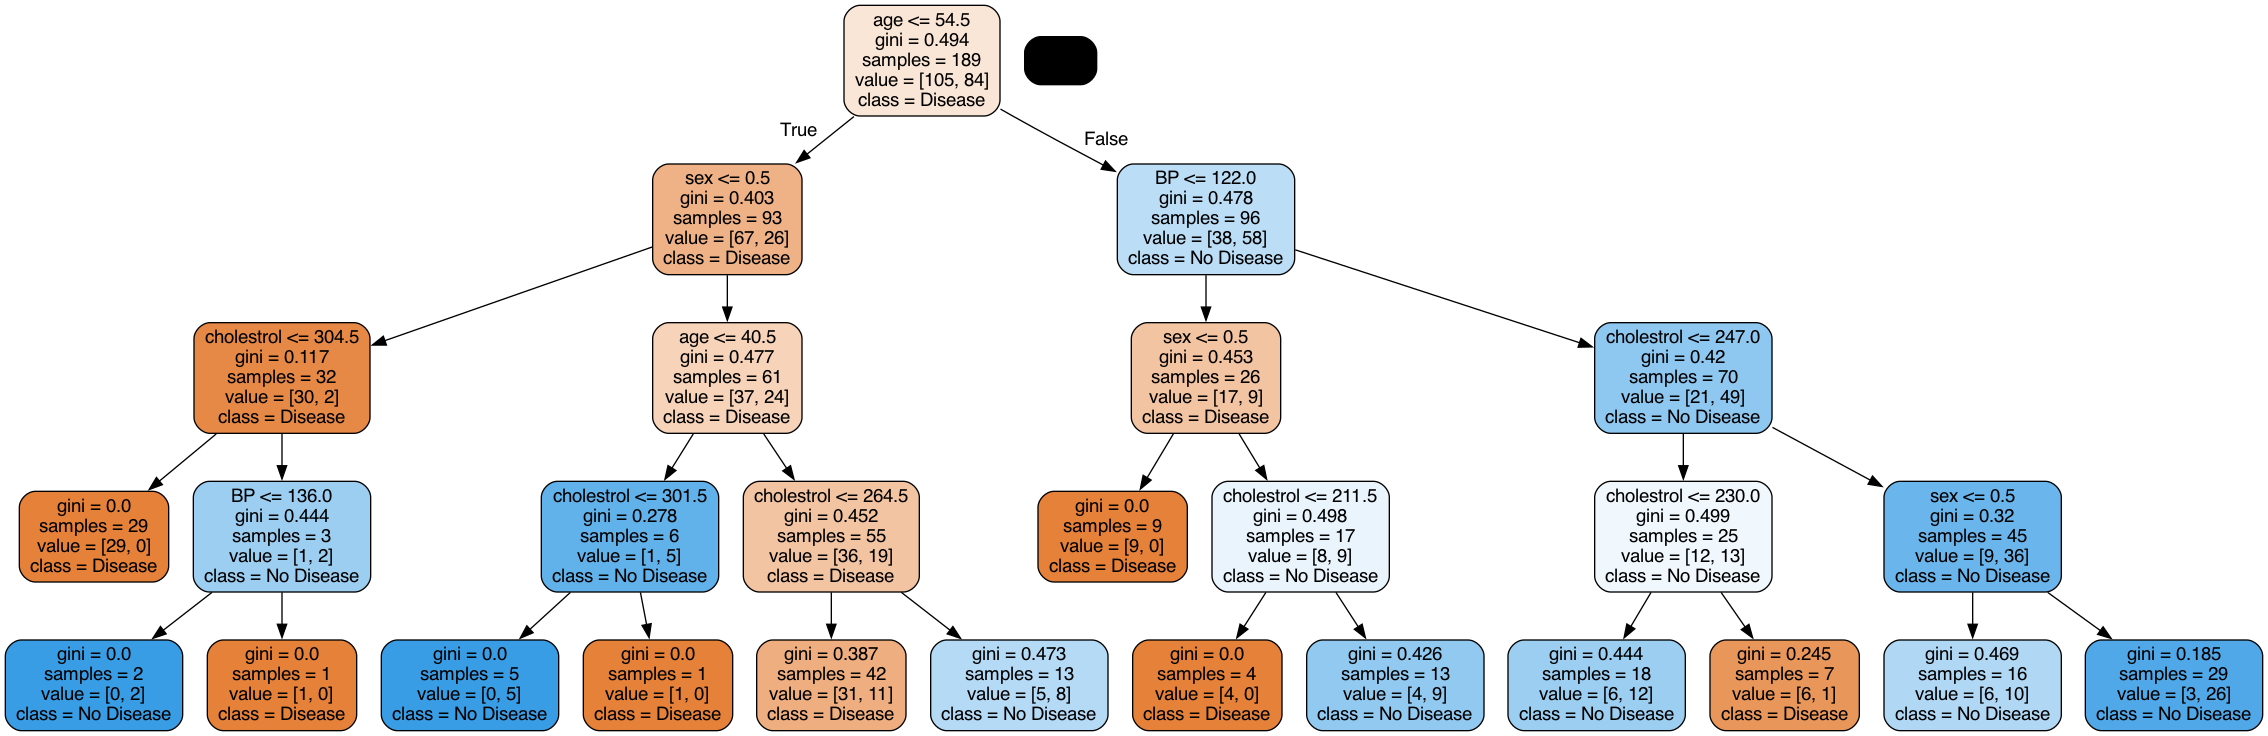

In [48]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [49]:
evaluate_model(dt_depth)

Train Accuracy : 0.8095238095238095
Train Confusion Matrix:
[[81 24]
 [12 72]]
--------------------------------------------------
Test Accuracy : 0.5432098765432098
Test Confusion Matrix:
[[20 25]
 [12 24]]


#### Note: Here the train accuracy is 80% and test accuracy is 54%. Lets check with other hyper parameters.

## 3. Use the minimum samples before split

In [52]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=100)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=100)

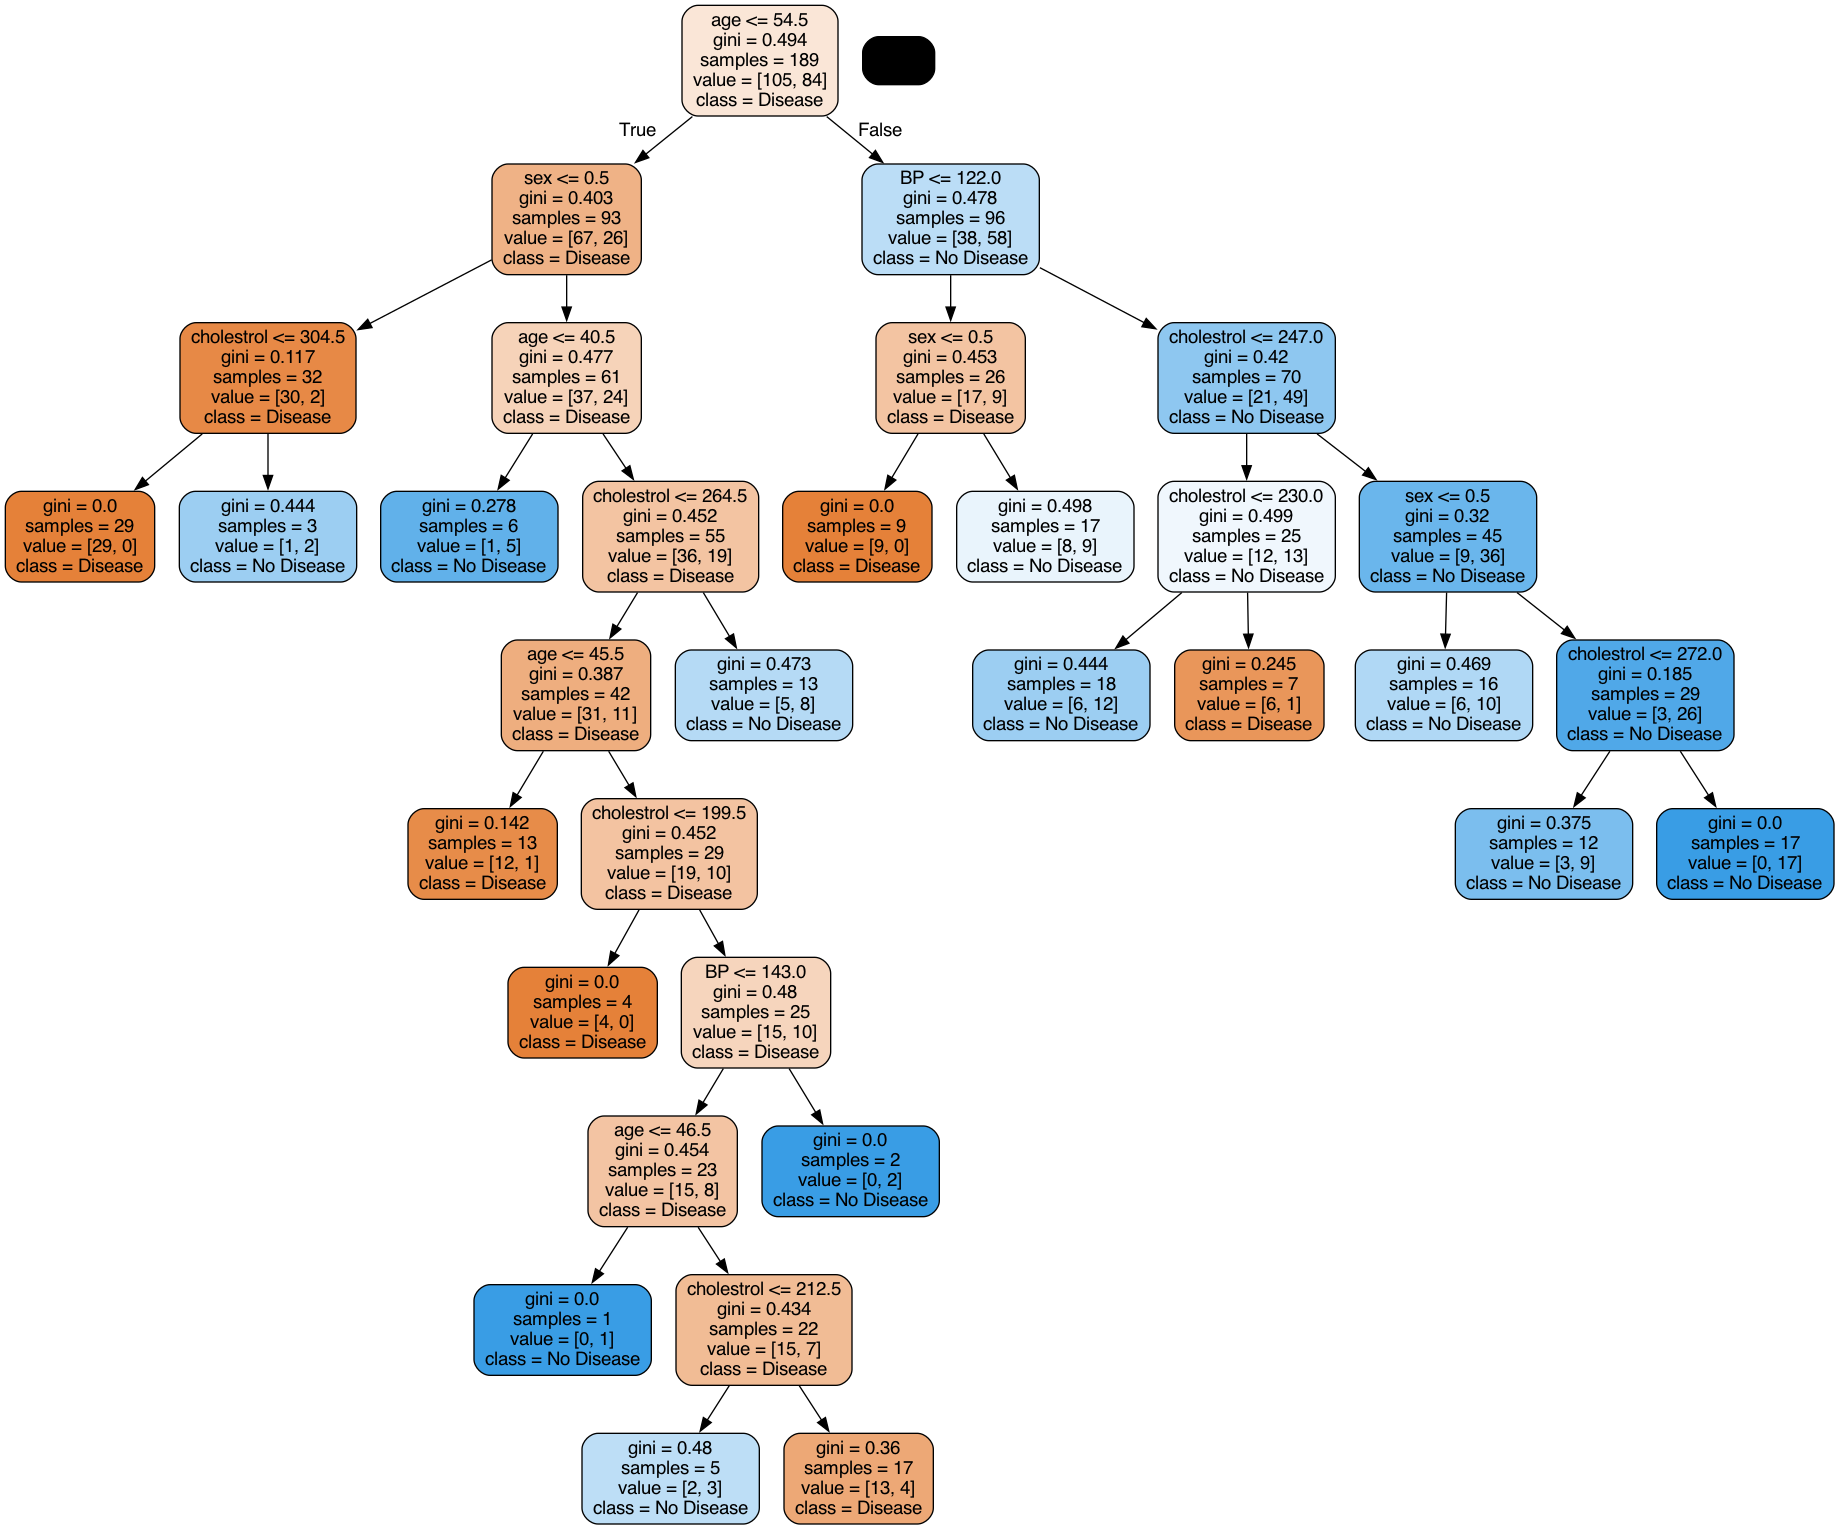

In [53]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [54]:
evaluate_model(dt_min_split)

Train Accuracy : 0.798941798941799
Train Confusion Matrix:
[[73 32]
 [ 6 78]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[18 27]
 [11 25]]


#### Note: It is also not improved too much. 

## 4. Use of minimum sample on leaf nodes.

In [56]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=100)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=100)

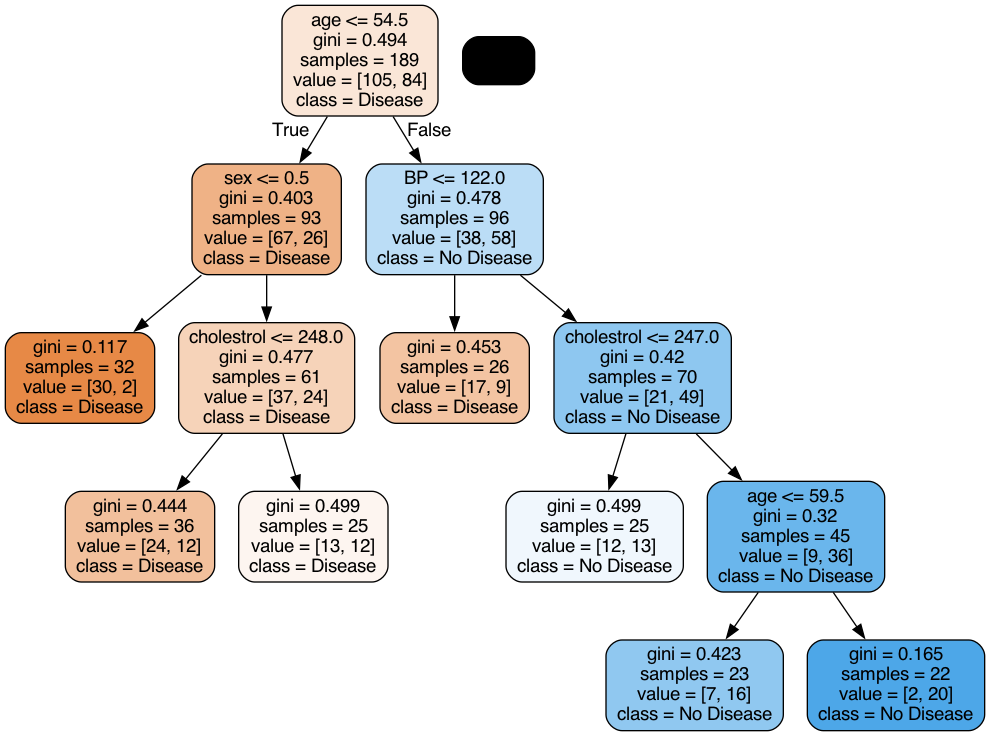

In [57]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [58]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


#### Note: It is also not improved too much for test sets. Lets check for another param. 

## Use Entropy in place of Gini

In [62]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=100, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=100)

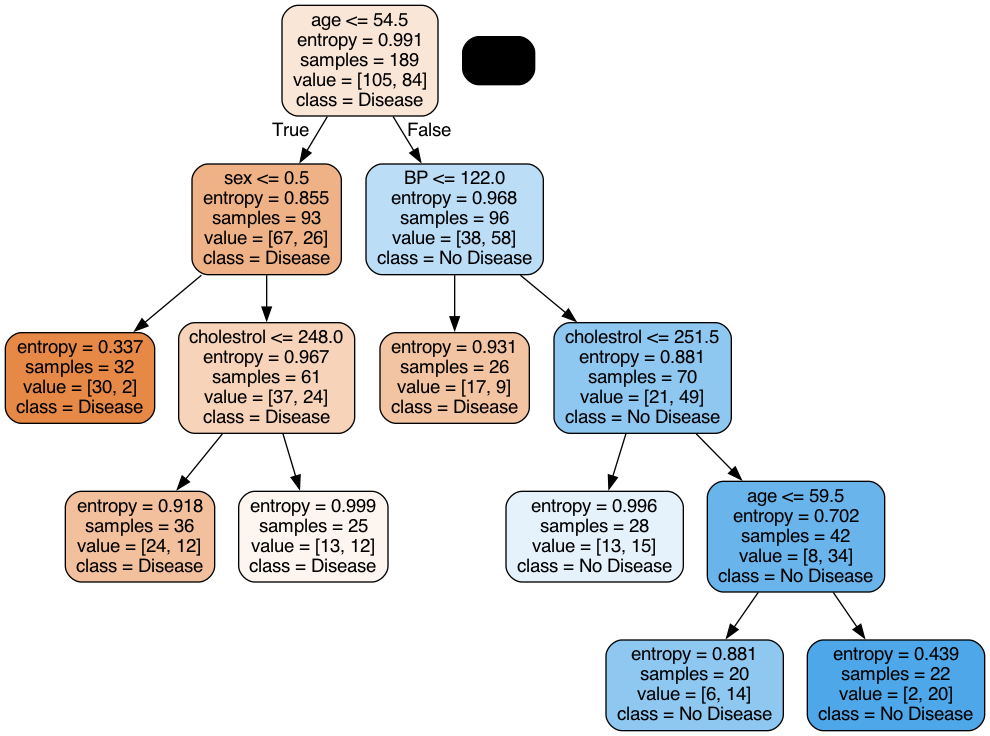

In [63]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [64]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[84 21]
 [35 49]]
--------------------------------------------------
Test Accuracy : 0.5308641975308642
Test Confusion Matrix:
[[27 18]
 [20 16]]


### Note: So far, we have learnt how to tune different hyperparameters manually. However, we cannot always choose the best set of hyperparameters for the model manually. Instead, we can use gridsearchcv() in Python, which uses the cross-validation technique.

## Hyper Parameters tuning using GridSearchCV

In [66]:
dt = DecisionTreeClassifier(random_state=100)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
#Specify the different params you want to try.
params = {
    'max_depth': [2,3,4,5,10,15,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ['gini', 'entropy']
}

In [70]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, #cv=5 is 5 fold
                           n_jobs=1, 
                           verbose=1, 
                           scoring='accuracy')

In [72]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
CPU times: user 611 ms, sys: 9.23 ms, total: 620 ms
Wall time: 626 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [75]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003351,0.003459,0.001339,0.000847,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.657895,0.710526,0.631579,0.648649,0.656046,0.029064,20
1,0.001103,0.000183,0.000640,0.000146,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.657895,0.710526,0.631579,0.621622,0.650640,0.032273,25
2,0.000955,0.000046,0.000569,0.000034,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.736842,0.763158,0.631579,0.621622,0.676956,0.060328,3
3,0.000986,0.000105,0.000562,0.000027,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.657895,0.684211,0.605263,0.605263,0.675676,0.645661,0.034060,26
4,0.000899,0.000038,0.000547,0.000011,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.552632,0.552632,0.552632,0.552632,0.567568,0.555619,0.005974,57


In [76]:
cv_df.shape

(70, 16)

In [77]:
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,0.000954,0.000026,0.000512,0.000007,entropy,4,5,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.631579,0.736842,0.763158,0.657895,0.702703,0.698435,0.048571,1
35,0.000890,0.000007,0.000519,0.000003,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.631579,0.736842,0.763158,0.631579,0.648649,0.682361,0.056197,2
2,0.000955,0.000046,0.000569,0.000034,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.631579,0.736842,0.763158,0.631579,0.621622,0.676956,0.060328,3
7,0.000970,0.000088,0.000541,0.000017,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.631579,0.736842,0.763158,0.631579,0.621622,0.676956,0.060328,3
12,0.000966,0.000044,0.000555,0.000032,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.631579,0.736842,0.763158,0.631579,0.621622,0.676956,0.060328,3


In [78]:
grid_search.best_score_

0.6984352773826458

In [79]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

In [80]:
dt_best = grid_search.best_estimator_

In [81]:
evaluate_model(dt_best)

Train Accuracy : 0.7671957671957672
Train Confusion Matrix:
[[86 19]
 [25 59]]
--------------------------------------------------
Test Accuracy : 0.5555555555555556
Test Confusion Matrix:
[[25 20]
 [16 20]]


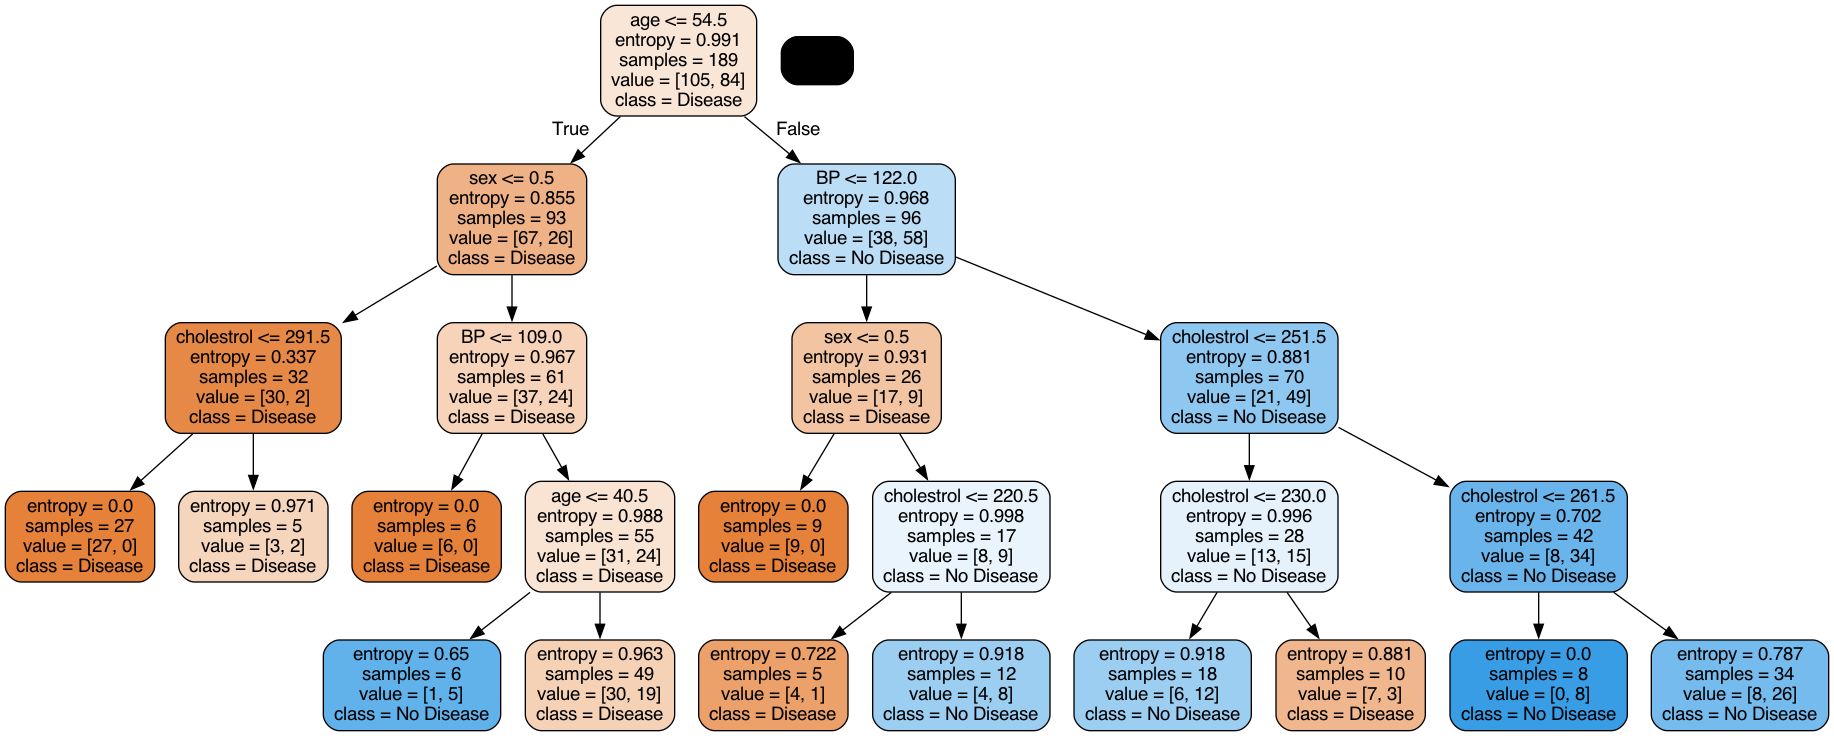

In [83]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Note: This is the best estimator from GridSearchCV. We can improve it by providing more params options.